In [2]:
# Cell to hide - just an option and import other functions

import pandas as pd
pd.set_option('display.max_columns', 27)

%run 1-functions.ipynb

For this section, we will see how the selection of the predictive attributes can lead to very different results in the prediction.

Again, you are asked to build a model to predict the Width of a ship. You can use any numerical attribute in the dataset. The static dataset is used here.

In [3]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

## The attributes

First, let's have a look at the list of the numerical attributes we can use in the dataset. We use the function [select_dtypes()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html) and the type ``np.number`` from the [numpy](https://docs.scipy.org/doc/numpy/reference/) library, which allows us to select all columns that are numerical.

In [4]:
import numpy as np

static_data.select_dtypes([np.number]).columns

Index(['TripID', 'MMSI', 'MeanSOG', 'VesselType', 'Length', 'Width', 'Draft',
       'Cargo', 'DepLat', 'DepLon', 'ArrLat', 'ArrLon'],
      dtype='object')

Now, we will build a model to predict the ``Width`` attribute, from a combination of these attributes. Change the value of the variable ``x`` as much as possible, adding more or less of the numerical attributes, and compare the results in the prediction.

In [5]:
from sklearn.metrics import mean_absolute_error

x = ['Length', 'TripID', 'MMSI']
y = ['Width']

predictions, ytest = knn_regression(static_data, x, y)
print('MAE: ' + str(mean_absolute_error(predictions, ytest)))

MAE: 4.929193421052632


## Compare the performances

Now we can plot the predictions made according to the value of ``x``, to better gauge the performance of the model built:

MAE: 4.929193421052632


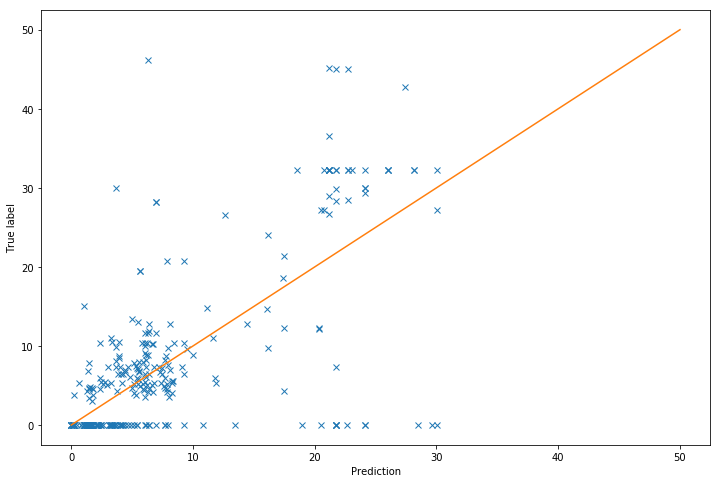

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

x = ['Length', 'TripID', 'MMSI']
y = ['Width']

predictions, ytest = knn_regression(static_data, x, y)
print('MAE: ' + str(mean_absolute_error(predictions, ytest)))

plt.figure(figsize = (12, 8))
pred = []
for element in predictions:
    pred.append(element[0])
plt.plot(pred, ytest, 'x')
            
x = np.linspace(0, 50, 50)
plt.plot(x, x)
    
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.show()

__TODO: Beginner version:__
Use the following widget and add or remove attributes to the predictive model. The first attribute is necessary, the other ones are optional. Try to find out which model gives the best prediction, and which one gives the worst.

In [9]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
import ipywidgets as widgets
from ipywidgets import interact

attributes = []
attributes.append('')
for att in static_data.select_dtypes([np.number]).columns:
    attributes.append(att)

def plot_pred(att1, att2, att3, att4, att5):
    
    plt.figure(figsize = (12, 8))
    
    x = []
    title = 'Prediction of Width from '
    for att in [att1, att2, att3, att4, att5]:
        if att != '':
            x.append(att)
            title = title + str(att) + ' '
            
    y = ['Width']

    predictions, ytest = knn_regression(static_data, x, y)
    print('MAE: ' + str(mean_absolute_error(predictions, ytest)))
    
    pred = []
    for element in predictions:
        pred.append(element[0])
    plt.plot(pred, ytest, 'x')
            
    x = np.linspace(0, 50, 50)
    plt.plot(x, x)
    
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title(title)

interact(plot_pred,
         att1 = widgets.Dropdown(options = attributes,
                                 value = attributes[1],
                                 description = 'Att 1:',
                                 disabled = False,),
        att2 = widgets.Dropdown(options = attributes,
                                 value = '',
                                 description = 'Att 2 (opt):',
                                 disabled = False,),
        att3 = widgets.Dropdown(options = attributes,
                                 value = '',
                                 description = 'Att 3 (opt):',
                                 disabled = False,),
        att4 = widgets.Dropdown(options = attributes,
                                 value = '',
                                 description = 'Att 4 (opt):',
                                 disabled = False,),
        att5 = widgets.Dropdown(options = attributes,
                                 value = '',
                                 description = 'Att 5 (opt):',
                                 disabled = False,))

interactive(children=(Dropdown(description='Att 1:', index=1, options=('', 'TripID', 'MMSI', 'MeanSOG', 'Vesse…

<function __main__.plot_pred(att1, att2, att3, att4, att5)>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Compare the following predictive models:
+ only ``Length``
+ ``Length`` and ``MMSI``
+ only ``MMSI``
+ only ``TripID``

As you can imagine, the attribute ``TripID``, having been artificially created, makes no sense in predicting the width of the ship. It is no surprising that it gives the worst performance.
The attribute ``Length`` is the best attribute to predict the width, which seems normal: by construction, the length and the width of a ship have to be more or less proportional. However, we see that adding the ``MMSI`` to the ``Length`` attribute pollutes the model and gives a worse performance. In fact, when we remove the ``Length`` attribute, the prediction doesn't change: the ``MMSI`` attribute takes all the lead on the ``Length`` attribute for the prediction.

## Generalization

In general, it is important to carefully consider which attributes are chosen for the prediction: more attributes means more information, but it doesn't necessarily leads to better result, as the added information can be useless or even prejudicial for the prediction.

The attributes such as ``TripID``, ``MMSI`` or ``VesselTypes`` represent a code: they are not continuous variables, and as a consequence, should not be used a numerical attributes. If we used them as numerical attributes, we would give a meaning to their value (in the sense: a lower value means something different than a higher value), when in the real world, they are just codes: two close values of these attributes don't necessarily mean a close meaning, like it is the case for continuous variables, where two instances with close values for length can mean close values for width.

## Quiz

<iframe src="https://h5p.org/h5p/embed/761741" width="694" height="600" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>